In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to your dataset
dataset_path = r"C:\Users\sachi\Downloads\Gastrovision"  # Your dataset path
output_path = r"C:\Users\sachi\Downloads\Prjct4_Split"  # Output directory for split dataset

# Define the split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create output directories
os.makedirs(output_path, exist_ok=True)
train_dir = os.path.join(output_path, 'train')
val_dir = os.path.join(output_path, 'val')
test_dir = os.path.join(output_path, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        # Get all image filenames in the class folder
        images = os.listdir(class_path)

        # Split the images into train, validation, and test sets
        train_images, temp_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Create class-specific directories in train, val, and test folders
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

        # Move the images to the respective directories
        for image in train_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_folder, image))
        for image in val_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_folder, image))
        for image in test_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_folder, image))

print("Dataset split into train, validation, and test folders successfully!")


Dataset split into train, validation, and test folders successfully!


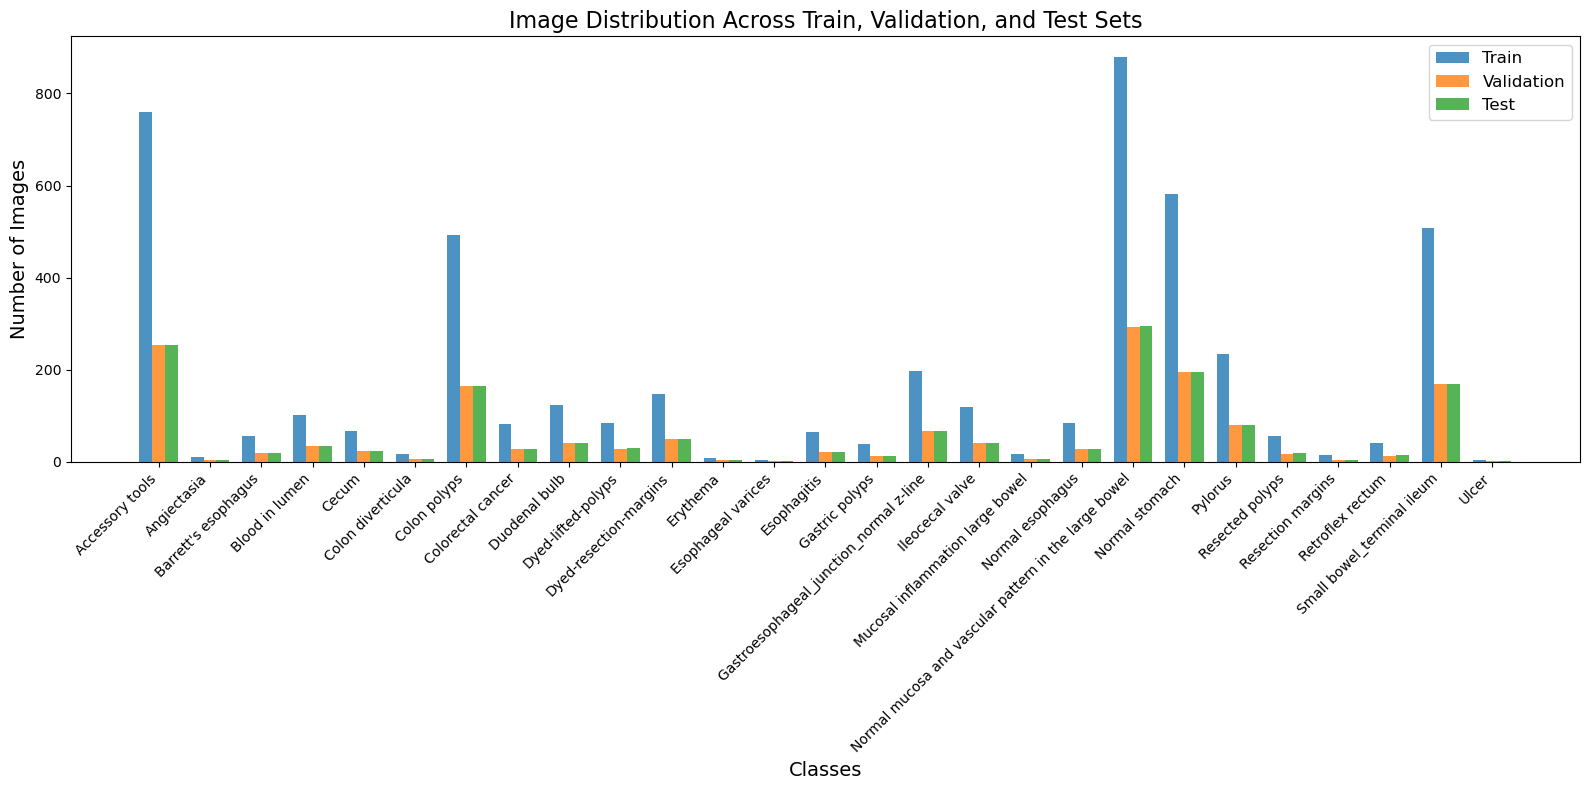

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Paths to train, validation, and test folders
train_dir = r"C:\Users\sachi\Downloads\Prjct4_Split\train"
val_dir = r"C:\Users\sachi\Downloads\Prjct4_Split\val"
test_dir = r"C:\Users\sachi\Downloads\Prjct4_Split\test"
data_dir = r"C:\Users\sachi\Downloads\Gastrovision"

# Function to count images in each class folder
def count_images(data_dir):
    class_counts = {}
    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

# Count images in each split
train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

# Combine all splits into a single dictionary for visualization
classes = list(train_counts.keys())
train_values = [train_counts.get(cls, 0) for cls in classes]
val_values = [val_counts.get(cls, 0) for cls in classes]
test_values = [test_counts.get(cls, 0) for cls in classes]

# Plot the distributions
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(16, 8))
plt.bar(x - width, train_values, width, label='Train', alpha=0.8)
plt.bar(x, val_values, width, label='Validation', alpha=0.8)
plt.bar(x + width, test_values, width, label='Test', alpha=0.8)

# Customizing the plot
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Distribution Across Train, Validation, and Test Sets', fontsize=16)
plt.xticks(x, classes, rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to train, validation, and test directories
train_dir = r"C:\Users\sachi\Downloads\Prjct4_Split\train"
val_dir = r"C:\Users\sachi\Downloads\Prjct4_Split\val"
test_dir = r"C:\Users\sachi\Downloads\Prjct4_Split\test"

# Parameters
IMG_SIZE = 224  # Image size (224x224 for standard input to CNNs)
BATCH_SIZE = 32  # Number of images per batch
EPOCHS = 10  # Number of training epochs
NUM_CLASSES = 27  # Number of classes (27 in this case)

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation="softmax")  # Softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


Found 4792 images belonging to 27 classes.
Found 1598 images belonging to 27 classes.
Found 1610 images belonging to 27 classes.


C:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 27)                  │           3,483 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,172,443 (42.62 MB)

 Trainable params: 11,172,443 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\sachi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.2940 - loss: 2.4673 - val_accuracy: 0.4793 - val_loss: 1.7204
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.4757 - loss: 1.7852 - val_accuracy: 0.5100 - val_loss: 1.5856
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.5259 - loss: 1.5149 - val_accuracy: 0.5257 - val_loss: 1.5566
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5733 - loss: 1.3606 - val_accuracy: 0.5920 - val_loss: 1.3759
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.6203 - loss: 1.1538 - val_accuracy: 0.5839 - val_loss: 1.4170
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.6766 - loss: 0.9999 - val_accuracy: 0.5620 - val_loss: 1.5476
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7337 - loss: 0.7999 - val_accuracy: 0.5782 - val_loss: 1.6399
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7810 - loss: 0.6304 - val_accu